# CURRENCY DETECTION USING CBIR

## IMPORTS

In [15]:
import cv2.cv2

from utils import *
from matplotlib import pyplot as plt
import os
from playsound import playsound

import subprocess
from gtts import gTTS

## CREATING THE DATASET OF THE IMAGES

In [16]:
training_set = []
def datasetimage(noteval):
	path, dirs, arr = next(os.walk("dataset/"+noteval))
	for i in range(0, len(arr)):
		training_set.append(path + '/' + arr[i])

datasetimage("10")
print("----RS10   loaded----")
datasetimage("20")
print("----RS20   loaded----")
datasetimage("100")
print("----RS100  loaded----")
datasetimage("200")
print("----RS200  loaded----")
datasetimage("500")
print("----RS500  loaded----")
datasetimage("2000")
print("----RS2000 loaded----")

----RS10   loaded----
----RS20   loaded----
----RS100  loaded----
----RS200  loaded----
----RS500  loaded----
----RS2000 loaded----


## A SIFT ALTERNATIVE FOR PYTHON

In [17]:
orb = cv2.ORB_create()
# orb is an alternative to SIFT

## CREATING THE INPUT IMAGE

In [18]:
test_img = read_img('testimg/test2.jpeg')

original = resize_img(test_img, 0.4)
(kp1, des1) = orb.detectAndCompute(test_img, None)
print("----INPUT IMAGE loaded----")

----INPUT IMAGE loaded----


### SOME DIFINED VALUES

In [22]:
max_val = 8
max_pt = -1
max_kp = 0

## GETTING THE DATASET IMAGE AND COMPARING WITH THE INPUT IMAGE

In [23]:
for i in range(0, len(training_set)):
	# train image
	#print(i)
	train_img = cv2.imread(training_set[i])
	(kp2, des2) = orb.detectAndCompute(train_img, None)
	bf = cv2.BFMatcher()
	all_matches = bf.knnMatch(des1, des2, k=2)
	good = []
	# give an arbitrary number -> 0.789
	# if good -> append to list of good matches
	for (m, n) in all_matches:
		if m.distance < 0.789 * n.distance:
			good.append([m])

	if len(good) > max_val:
		max_val = len(good)
		max_pt = i
		max_kp = kp2
	

### PRINTING THE BEST MATCH FROM THE DATASET

dataset/200/77.jpg
good matches  57
dataset/200/77.jpg


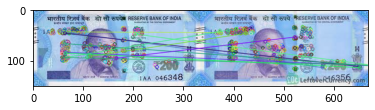

In [24]:
if max_val >=8:
	print(training_set[max_pt])
	print('good matches ', max_val)
	train_img = cv2.imread(training_set[max_pt])
	img3 = cv2.drawMatchesKnn(test_img, kp1, train_img, max_kp, good, 4)
	note = str(training_set[max_pt])
	print(note)
	(plt.imshow(img3), plt.show())
else:
	print('No Matches')